In [ ]:
#@title [E-01]classification_digits
# (1) 필요한 모듈 import
import sklearn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#import graphviz

from sklearn.datasets import load_digits #싸이킷런 데이터셋에 있는 digits를 불러오는 코드
from sklearn.datasets import load_wine #싸이킷런 데이터셋에 있는 wine를 불러오는 코드
from sklearn.datasets import load_breast_cancer #싸이킷런 데이터셋에 있는 유방암진단데이터 를 불러오는 코드

from sklearn.model_selection import train_test_split #싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.tree import DecisionTreeClassifier # 싸이킷런에 있는 결정트리분류기를 사용하기 위해 불러오는 코드
from sklearn.metrics import classification_report #싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
#from sklearn.tree import export_graphviz




# (2-1) 데이터 준비(digits)
digits = load_digits()              #load_digits 데이터셋으로부터 데이터를 불러와 digits 라는 변수에 저장
digits_data = digits.data          #digits데이터의 data컬럼을 분류해 digits_data변수에 담는다. 
digits_label = digits.target       # digits데이터의 target컬럼을 분류해 digits_label 변수에 담는다.


# (3-1) train, test 데이터 분리 (digits)
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25) 


# (4-1-1) 모델 학습 및 예측 -Decision Tree (digits)

decision_tree = DecisionTreeClassifier(random_state=25) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.
cm1 = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("학습방법1) Decision Tree - digits")
print(classification_report(y_test, y_pred))
print("Accuracy: {}".format(ac))


# 혼동 행렬시각화 
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm1, annot=True)
ax.set(title='Confusion Matrix-Decision Tree',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-1-2) 모델 학습 및 예측 - RandomForest (digits)
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

random_forest = RandomForestClassifier(random_state=25) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측
cm2 = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("학습방법2) RandomForest - digits")
print(classification_report(y_test, y_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm2, annot=True)
ax.set(title='Confusion Matrix-RandomForest',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-1-3) 모델 학습 및 예측 - SGDClassifier
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측
cm3 = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print("학습방법3) SGD - digits")
print(classification_report(y_test, y_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm3, annot=True)
ax.set(title='Confusion Matrix-SGD',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-1-4) 모델 학습 및 예측 - Logistic Regression
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression(max_iter = 4000) # 모델 객체 생성
logistic_model.fit(X_train, y_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred = logistic_model.predict(X_test) # 예측
cm4 = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print("학습방법4) Logistic Regression - digits")
print(classification_report(y_test, y_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm4, annot=True)
ax.set(title='Confusion Matrix-Logistic Regression',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-1-5) 모델 학습 및 예측 - SVM
from sklearn import svm

svm_model = svm.SVC() # 모델 객체 생성
svm_model.fit(X_train, y_train) #SVM모델로 훈련데이터를 가지고 훈련시킨다.
svm_y_pred = svm_model.predict(X_test)# 예측
cm5 = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print("학습방법5) SVM - digits")
print(classification_report(y_test, svm_y_pred))# 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm5, annot=True)
ax.set(title='Confusion Matrix-SVM',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")


print('''
###회고 (digits)
## 데이터는 총 1,797개가 있고, 각 데이터는 64(8x8)개의 숫자로 구성되어 있습니다. 
# 20%의 Test Data(360개)로 훈련모델을 수행하였으며, 결과를 취득하였음을 확인하였습니다. 
# 'random_state=32'로  RandomForest분류기 객체생성조건 규칙을 주었습니다.
# random_state를 None 으로 설정했을 경우 난수 생성에 어떠한 규칙이 바뀌어 support의 횟수가 일관적이지않아 테스트 결과가 일부변화가 있었습니다.

## 모델 평가에 있어 다음의 사항이 고려되었습니다.
#  1. 데이터 Target이 균형있게 분포되어 있는지 여부를 확인하였습니다.
#  2. 각 숫자별 training이 균일하게 시행되었음을 확인하였으며, (각 숫자별 31회~ 40회) 데이터의 불균형은 확인되지 않았습니다.
#  3. 따라서, 분류평가지표중 정확도'Accuracy' 기준으로 모델선정을 할 수 있습니다. 
#  4. RandomForest 모델의 경우 97%의 정확도로 다른 모델대비 높은 accuracy를 보여주고 있으므로 적정모델로 선정하고자 합니다.

## 특정모델별  판별에 어려움이 있는 특정 숫자가 발견되었으며 원인 및 분석이 필요하며 성능개선을 위한 조사 및 분석을 추후에 하고자 합니다.
#  1. Decision Tree 모델의 경우 2,3,6,7,8을 판별하는데 어려움이 있음
#  2. SGD모델은 1,3,6,7,9을 판단하는데 어려움이 있음
#  3. Logisitic Regression과 SVM은 '7'을 판단하는데 어려움이 있음

## Logisitic Regression과 SVM의 경우 판독결과 패턴이 비슷하게 확인되어, 관련 모델에 대한 원리를 더 깊이 알아야 할 필요성을 느낌

## 아래의 공식문서, 유튜브강의, 기술블로그를 참고하여 데이터를 분석하는데 이해를 구할 수 있었습니다. 
#  1. 
#  2. 
#  3. 
 
''')





In [ ]:
#@title [E-01]classification_wine
# (2-2) 데이터 준비(wine)
wine = load_wine()              #load_wine 데이터셋으로부터 데이터를 불러와 digits 라는 변수에 저장
wine_data = wine.data          #wine데이터의 data컬럼을 분류해 wine_data변수에 담는다. 
wine_label = wine.target       # wine데이터의 target컬럼을 분류해 wine_label 변수에 담는다.


#wine.target_names ==> array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# (3-2) train, test 데이터 분리 (wine)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=25) 

# (4-2-1) 모델 학습 및 예측 -Decision Tree (wine)
decision_tree = DecisionTreeClassifier(random_state=25)    #결정트리분류기의 객체
decision_tree.fit(Xw_train, yw_train)                                # 분류기에 x와 y의 훈련 데이터를 넣어 훈련
yw_pred = decision_tree.predict(Xw_test)                        # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인
cm6 = confusion_matrix(yw_test, yw_pred)                          #오차행렬 생성
ac = accuracy_score(yw_test, yw_pred)                                # 정확도 측정

print("학습방법1) Decision Tree - wine")
print(classification_report(yw_test, yw_pred))
print(confusion_matrix(yw_test, yw_pred))
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
# ticklabel = ['class 1', 'class 2', 'class 3']
# plt.xticks(np.arange(0.5, len(wine.target_names), 1), wine.target_names)
ax = sns.heatmap(cm6, annot=True)
ax.set(title='Confusion Matrix-Decision Tree (wine)',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-2-2) 모델 학습 및 예측 - RandomForest (wine)
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

random_forest = RandomForestClassifier(random_state=25) # RandomForest분류기 객체를 생성
random_forest.fit(Xw_train, yw_train) # 훈련
yw_pred = random_forest.predict(Xw_test) # 예측
cm7 = confusion_matrix(yw_test, yw_pred)
ac = accuracy_score(yw_test, yw_pred)
print("학습방법2) RandomForest - wine")
print(classification_report(yw_test, yw_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm7, annot=True)
ax.set(title='Confusion Matrix-RandomForest',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-2-3) 모델 학습 및 예측 - SGDClassifier(wine)

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(Xw_train, yw_train) # sgd모델로 훈련데이터로 훈련시킨다.
yw_pred = sgd_model.predict(Xw_test)# 그 모델로 test데이터를 사용해 예측
cm8 = confusion_matrix(yw_test, yw_pred)
ac = accuracy_score(yw_test, yw_pred)

print("학습방법3) SGD - wine")
print(classification_report(yw_test, yw_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm8, annot=True)
ax.set(title='Confusion Matrix-SGD',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-2-4) 모델 학습 및 예측 - Logistic Regression(wine)
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression(max_iter = 4000) # 모델 객체 생성
logistic_model.fit(Xw_train, yw_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
yw_pred = logistic_model.predict(Xw_test) # 예측
cm9 = confusion_matrix(yw_test, yw_pred)
ac = accuracy_score(yw_test, yw_pred)

print("학습방법4) Logistic Regression - wine")
print(classification_report(yw_test, yw_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm9, annot=True)
ax.set(title='Confusion Matrix-Logistic Regression -wine',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-2-5) 모델 학습 및 예측 - SVM (wine)
from sklearn import svm

svm_model = svm.SVC() # 모델 객체 생성
svm_model.fit(Xw_train, yw_train) #SVM모델로 훈련데이터를 가지고 훈련시킨다.
svm_y_pred = svm_model.predict(Xw_test)# 예측
cm10 = confusion_matrix(yw_test, yw_pred)
ac = accuracy_score(yw_test, yw_pred)

print("학습방법5) SVM - wine")
print(classification_report(yw_test, svm_y_pred))# 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm10, annot=True)
ax.set(title='Confusion Matrix-SVM-wine',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")


print('''
##회고 (wine)


''')



학습방법1) Decision Tree - cancer
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

[[33  6]
 [ 3 72]]
Accuracy: 0.9210526315789473

학습방법2) RandomForest - cancer
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.95      0.96      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702

학습방법3) SGD - cancer
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy            

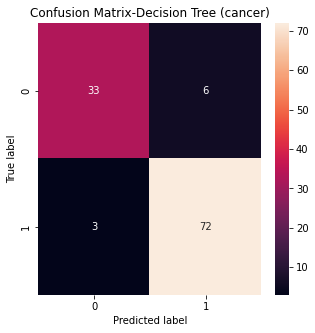

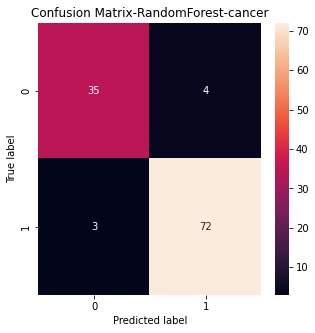

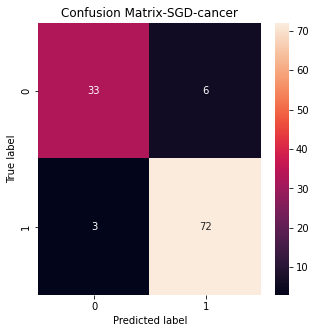

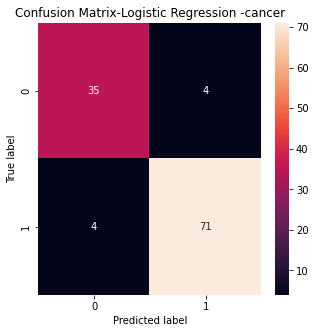

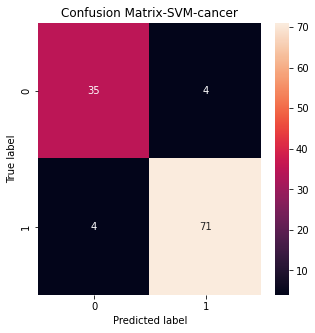

In [4]:
#@title [E-01]classification_load breast cancer
# (2-3) 데이터 준비(load_breast_cancer)
from sklearn.datasets import load_breast_cancer #싸이킷런 데이터셋에 있는 유방암진단데이터 를 불러오는 코드

cancer = load_breast_cancer()              #load_wine 데이터셋으로부터 데이터를 불러와 digits 라는 변수에 저장
cancer_data = cancer.data          #wine데이터의 data컬럼을 분류해 wine_data변수에 담는다. 
cancer_label = cancer.target       # wine데이터의 target컬럼을 분류해 wine_label 변수에 담는다.

#cancer.target_names ==> array(['malignant', 'benign'], dtype='<U9')

# (3-3) train, test 데이터 분리 (load_breast_cancer)
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=25) 

# (4-3-1) 모델 학습 및 예측 -Decision Tree (cancer)
decision_tree = DecisionTreeClassifier(random_state=25)    #결정트리분류기의 객체
decision_tree.fit(Xc_train, yc_train)                                # 분류기에 x와 y의 훈련 데이터를 넣어 훈련
yc_pred = decision_tree.predict(Xc_test)                        # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인
cm11 = confusion_matrix(yc_test, yc_pred)                          #오차행렬 생성
ac = accuracy_score(yc_test, yc_pred)                                # 정확도 측정

print("학습방법1) Decision Tree - cancer")
print(classification_report(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm11, annot=True)
ax.set(title='Confusion Matrix-Decision Tree (cancer)',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-3-2) 모델 학습 및 예측 - RandomForest (cancer)
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

random_forest = RandomForestClassifier(random_state=25) # RandomForest분류기 객체를 생성
random_forest.fit(Xc_train, yc_train) # 훈련
yc_pred = random_forest.predict(Xc_test) # 예측
cm12 = confusion_matrix(yc_test, yc_pred)
ac = accuracy_score(yc_test, yc_pred)
print("학습방법2) RandomForest - cancer")
print(classification_report(yc_test, yc_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm12, annot=True)
ax.set(title='Confusion Matrix-RandomForest-cancer',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# (4-2-3) 모델 학습 및 예측 - SGDClassifier(cancer)
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(Xc_train, yc_train) # sgd모델로 훈련데이터로 훈련시킨다.
yc_pred = sgd_model.predict(Xc_test)# 그 모델로 test데이터를 사용해 예측
cm13 = confusion_matrix(yc_test, yc_pred)
ac = accuracy_score(yc_test, yc_pred)

print("학습방법3) SGD - cancer")
print(classification_report(yc_test, yc_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm13, annot=True)
ax.set(title='Confusion Matrix-SGD-cancer',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-2-4) 모델 학습 및 예측 - Logistic Regression(cancer)
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression(max_iter = 4000) # 모델 객체 생성
logistic_model.fit(Xc_train, yc_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
yc_pred = logistic_model.predict(Xc_test) # 예측
cm14 = confusion_matrix(yc_test, yc_pred)
ac = accuracy_score(yc_test, yc_pred)

print("학습방법4) Logistic Regression - cancer")
print(classification_report(yc_test, yc_pred)) # 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm14, annot=True)
ax.set(title='Confusion Matrix-Logistic Regression -cancer',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

# # (4-2-5) 모델 학습 및 예측 - SVM (cancer)
from sklearn import svm

svm_model = svm.SVC() # 모델 객체 생성
svm_model.fit(Xc_train, yc_train) #SVM모델로 훈련데이터를 가지고 훈련시킨다.
svm_y_pred = svm_model.predict(Xc_test)# 예측
cm15 = confusion_matrix(yc_test, yc_pred)
ac = accuracy_score(yc_test, yc_pred)

print("학습방법5) SVM - cancer")
print(classification_report(yc_test, svm_y_pred))# 결과 지표를 확인
print("Accuracy: {}".format(ac))

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm15, annot=True)
ax.set(title='Confusion Matrix-SVM-cancer',
            ylabel='True label',
            xlabel='Predicted label')


print("====================================\n")

print('''
##회고 (load_breast_cancer)
# 총 30개의 속성과 malignant(악성), benign(양성) 의 두가지 타겟값을 가지고 있다

''')
